STOCK VOLATILITY 

Hemant Thapa

Date: 27/02/2023

Standard deviation is a statistical measure of the amount of variation or dispersion of a set of values. It gives an idea of how far the values in a dataset are from the mean (average) value. In other words, it measures the spread of the data.

A low standard deviation indicates that the values are close to the mean, while a high standard deviation indicates that the values are spread out over a wider range. The standard deviation is a useful measure for understanding the distribution of data, and it is often used in financial analysis to evaluate the volatility of stock prices or other financial instruments.

In finance, standard deviation is often used as a risk indicator. A stock with a high standard deviation is considered more volatile, meaning its price can change more dramatically over a given period of time than a stock with a low standard deviation.

In [81]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import keras 
import pyttsx3
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [82]:
def stock_volatility(close_prices):
    daily_returns = close_prices.pct_change().dropna()
    mean = daily_returns.mean().iloc[0]
    standard_deviation = np.std(daily_returns).iloc[0]

    if standard_deviation < 0.05:
        result = f"The standard deviation of the stock's daily returns is {standard_deviation:.4f}. This stock can be considered relatively safe to trade."
    elif standard_deviation >= 0.05 and standard_deviation < 0.1:
        result = f"The standard deviation of the stock's daily returns is {standard_deviation:.4f}. This stock is moderately safe to trade."
    else:
        result = f"The standard deviation of the stock's daily returns is {standard_deviation:.4f}. This stock is considered risky to trade."
    
    plt.style.use('dark_background')
    plt.figure(figsize=(15,7))
    plt.grid(True, color='grey')
    plt.plot(daily_returns, label="Stock Daily Returns", color='#2ecc71')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Plot the standard deviation
    plt.axhline(mean, color='red', label=f"Mean ({mean:.4f})")
    plt.axhspan(mean - standard_deviation, mean + standard_deviation, color='#f1c40f', alpha=0.5,
                label=f"Standard Deviation ({standard_deviation:.4f})")
    # Add title, labels, and legend
    plt.title("Stock Daily Returns and Standard Deviation")
    plt.xlabel("Time")
    plt.ylabel("Returns")
    plt.legend()
    # Show the plot
    plt.show()

    print(result)
    tts = pyttsx3.init()
    tts.setProperty('rate', 160)
    tts.say(result)
    tts.runAndWait()

In [88]:
ticker_list = ['AAPL']

In [91]:

def get_close_price(ticker_list):
    close_prices = {}
    for ticker in ticker_list:
        stock = yf.Ticker(ticker).history(period="365d")
        close_price = stock["Close"]
        close_prices[ticker] = close_price
    return close_prices
close_prices = get_close_price(ticker_list)

df = pd.DataFrame(close_prices)
df.tail(2)

,AAPL
Date,
2023-02-24 00:00:00-05:00,146.710007
2023-02-27 00:00:00-05:00,148.160004


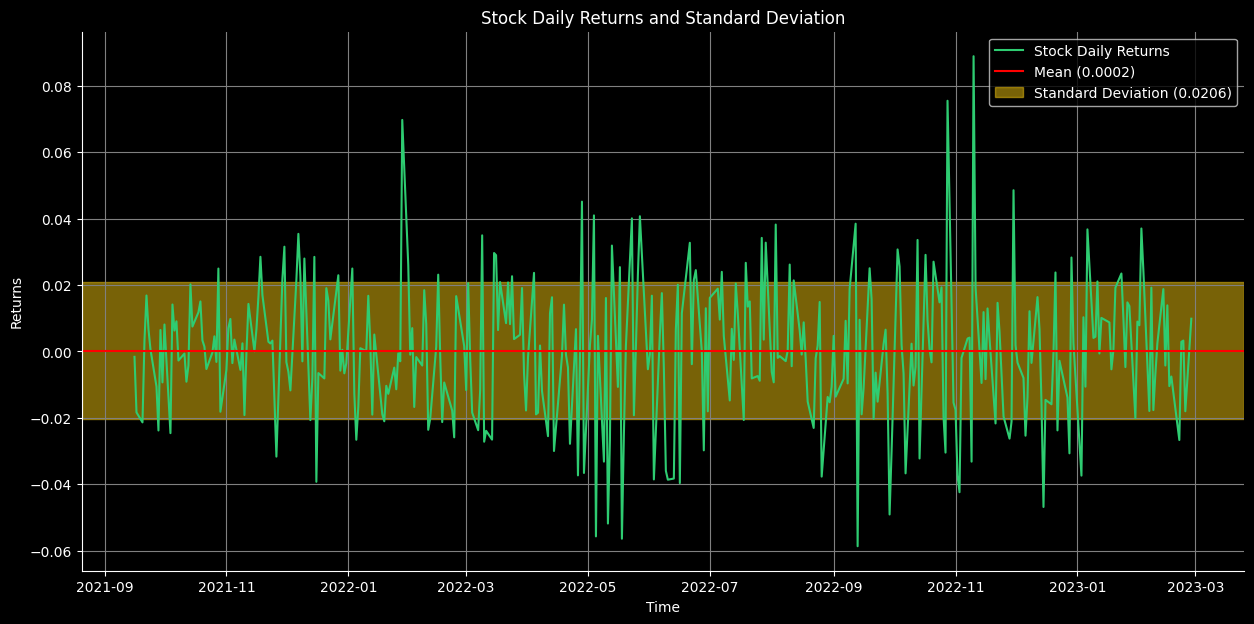

The standard deviation of the stock's daily returns is 0.0206. This stock can be considered relatively safe to trade.


In [92]:
stock_volatility(df)

In [93]:
def stock_volatility(close_prices):
    daily_returns = close_prices.pct_change().dropna()
    standard_deviation = np.std(daily_returns).iloc[0]

    if standard_deviation < 0.05:
        result = f"The standard deviation of the stock's daily returns is {standard_deviation:.4f}. This stock can be considered relatively safe to trade."
    elif standard_deviation >= 0.05 and standard_deviation < 0.1:
        result = f"The standard deviation of the stock's daily returns is {standard_deviation:.4f}. This stock is moderately safe to trade."
    else:
        result = f"The standard deviation of the stock's daily returns is {standard_deviation:.4f}. This stock is considered risky to trade."

    plt.style.use('dark_background')
    plt.figure(figsize=(15,7))
    plt.grid(True, color='grey')
    plt.hist(daily_returns, bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
    plt.axvline(standard_deviation, color='red',
                label=f"Standard Deviation ({standard_deviation:.4f})")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Add title, labels, and legend
    plt.title("Histogram of Stock Daily Returns")
    plt.xlabel("Returns")
    plt.ylabel("Frequency")
    plt.legend()
    # Show the plot
    plt.show()

    print(result)
    tts = pyttsx3.init()
    tts.setProperty('rate', 160)
    tts.say(result)
    tts.runAndWait()

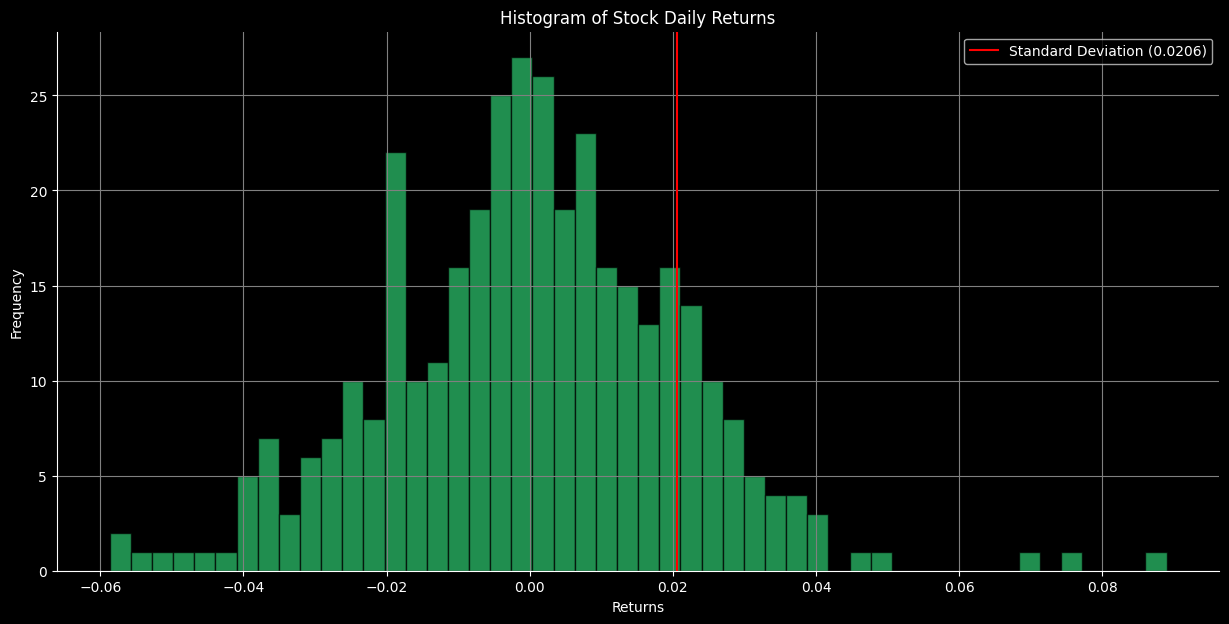

The standard deviation of the stock's daily returns is 0.0206. This stock can be considered relatively safe to trade.


In [94]:
stock_volatility(df)